In [2]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
  
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y
  
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [ ]:
# 가중치 매개변수 접근
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [7]:
# 예측 처리
x = np.random.rand(100, 784)
y = net.predict(x)

print(y)

[[0.10647643 0.10077733 0.09353472 0.10242111 0.10587038 0.09600511
  0.09980209 0.10354371 0.09672551 0.09484362]
 [0.1061995  0.10063524 0.09363212 0.10223145 0.10514356 0.09626505
  0.09975    0.10394011 0.09700925 0.09519372]
 [0.10631689 0.10099779 0.09367917 0.10185661 0.10573854 0.09583692
  0.10012275 0.10394717 0.09672347 0.0947807 ]
 [0.10667504 0.10083206 0.09367995 0.10259104 0.10539506 0.09559828
  0.09993436 0.10360248 0.09682199 0.09486976]
 [0.10642006 0.10064735 0.09383332 0.10243788 0.10522889 0.09636794
  0.09974586 0.10377171 0.09695871 0.09458828]
 [0.10644762 0.10083232 0.09379438 0.10256053 0.10584972 0.0956717
  0.09978234 0.10364744 0.09672734 0.09468662]
 [0.10650457 0.10070116 0.09387432 0.1019463  0.10553429 0.09602446
  0.10001846 0.10366583 0.09667354 0.09505708]
 [0.1067876  0.10090131 0.0935124  0.10227508 0.10547126 0.09586114
  0.1001201  0.10347101 0.09672744 0.09487267]
 [0.10641544 0.10078823 0.09386108 0.10222173 0.10513374 0.09614828
  0.0999789  

In [ ]:
# 미니배치 학습 구현하기
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_init = []
train_acc_list = []
test_acc_list = []

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grad = network.numerical_gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  loss = network.loss(x_batch, t_batch)
  train_loss_init.append(loss)

  print(f'processing {i}')

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ', ' + str(test_acc))


processing 0
processing 1
processing 2
processing 3
processing 4
processing 5
processing 6
processing 7
processing 8
processing 9
processing 10
processing 11
processing 12
processing 13
processing 14
processing 15


KeyboardInterrupt: 

[np.float64(2.2899845439172304), np.float64(2.289124461206791), np.float64(2.297134622283042), np.float64(2.2858753787055393), np.float64(2.2975680364343787), np.float64(2.286459532427894), np.float64(2.274321747855378), np.float64(2.3031071797489133), np.float64(2.287072727868371), np.float64(2.2927318238229804), np.float64(2.288222344744765), np.float64(2.2960831460923554), np.float64(2.301288063269686), np.float64(2.304999872099575), np.float64(2.29071454047077), np.float64(2.297798622958332)]


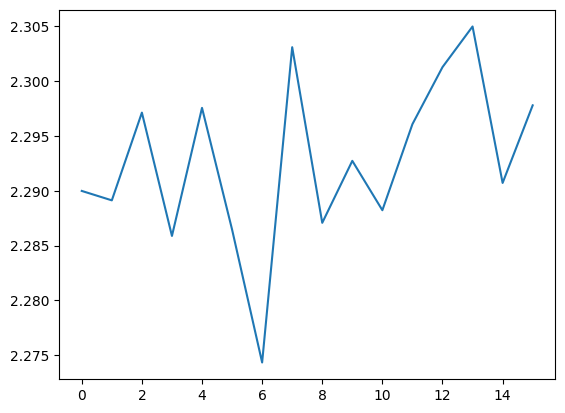

In [15]:
import matplotlib.pylab as plt

plt.plot(range(len(train_loss_init)), train_loss_init)
print(train_loss_init)
